In [25]:
import sys
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from fast_nn import FNN

# 1: Load the dataset
# 2: Create the FNN model
# 3: Run the preprocess part

In [26]:
df_train = pd.read_csv("./data/sign_mnist_full.csv")
X = df_train.drop(columns='label')
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.tolist(), test_size=0.20)

fnn = FNN(X_train, y_train, X_test, y_test)
fnn.preprocess()

100%|██████████| 29/29 [18:05<00:00, 37.44s/it]


# Dataset Distribution

[293, 301, 308, 262, 293, 299, 299, 286, 303, 277, 278, 265, 311, 297, 291, 285, 297, 271, 276, 318, 294, 267, 275, 280]


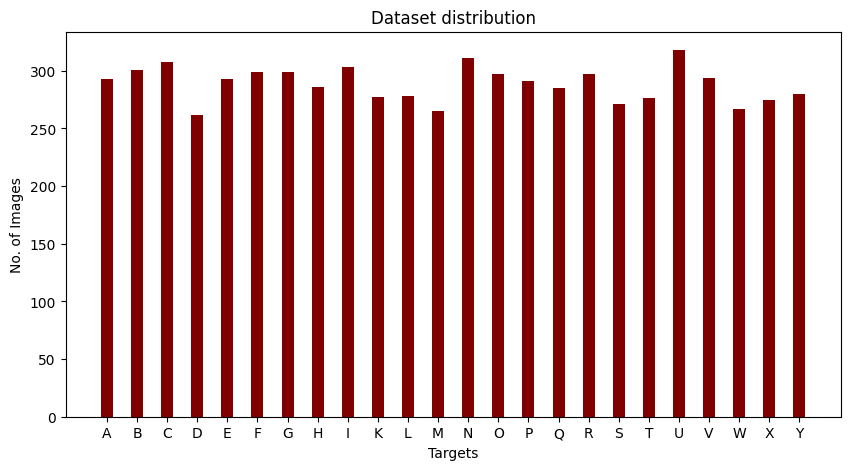

In [35]:
import numpy as np
from collections import Counter
data1 = {'A': 290, 'B': 280, 'C': 322, 'D': 294, 'E': 290, 'F': 289, 'G': 300, 'H': 291, 'I': 300, 'K': 306, 'L': 276, 'M': 282, 'N': 313, 'O': 254, 'P': 276, 'Q': 285, 'R': 264, 'S': 272, 'T': 318, 'U': 271, 'V': 277, 'W': 303, 'X': 277, 'Y': 296}
data = Counter(y_test)
courses = list(data1.keys())
# values = list(data1.values())
values = list(data.values())
print(values)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Targets")
plt.ylabel("No. of Images")
plt.title("Test set distribution")
plt.show()

# Classification part
Compute each X_test point using the specified epsilon

In [27]:
epsilon: float = 1
posList = []
# For each point in the test set, find the closest point in the training set
for p in tqdm(fnn.X_test):
    # Find the closest point in the training set to the point in the test set
    pos = fnn.closet(p, epsilon)
    # Add the label of the closest point to the list of predictions
    posList.append(pos)

100%|██████████| 6926/6926 [01:06<00:00, 104.16it/s]


# Result part
Calculate the accuracy
Show the confusion matrix and the classification report

Accuracy: 0.9911926075656945
Confusion Matrix:


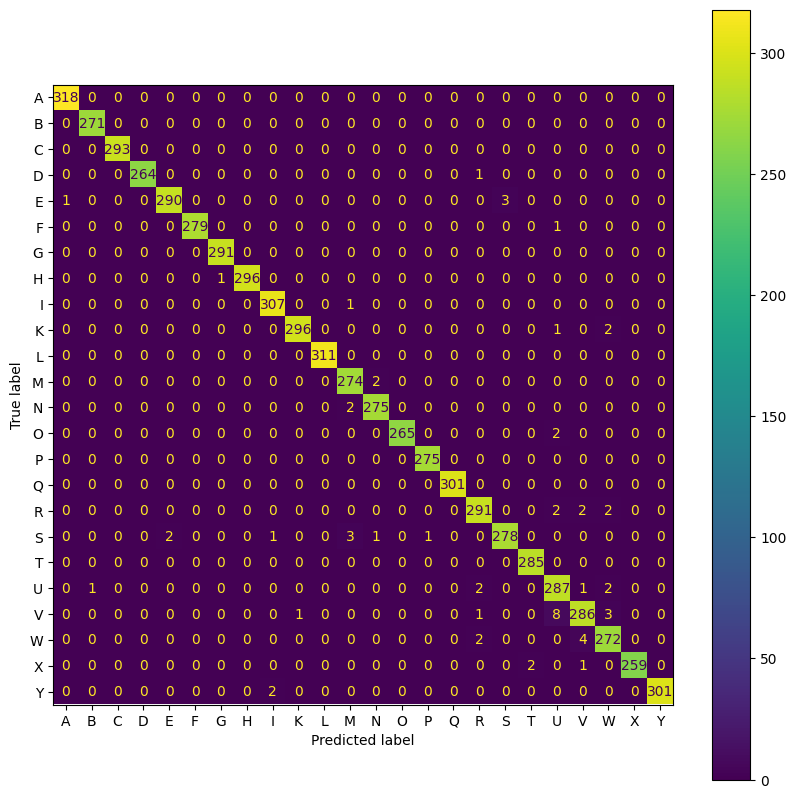

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       318
           B       1.00      1.00      1.00       271
           C       1.00      1.00      1.00       293
           D       1.00      1.00      1.00       265
           E       0.99      0.99      0.99       294
           F       1.00      1.00      1.00       280
           G       1.00      1.00      1.00       291
           H       1.00      1.00      1.00       297
           I       0.99      1.00      0.99       308
           K       1.00      0.99      0.99       299
           L       1.00      1.00      1.00       311
           M       0.98      0.99      0.99       276
           N       0.99      0.99      0.99       277
           O       1.00      0.99      1.00       267
           P       1.00      1.00      1.00       275
           Q       1.00      1.00      1.00       301
           R       0.98      0.98      0.98       297
    

In [29]:
result_label_list = []
for pos in posList:
    result_label_list.append(fnn.y_train[pos])

# Print the accuracy of the predictions
print("Accuracy:", accuracy_score(fnn.y_test, result_label_list))

# Print the confusion matrix of the result_label_list
print("Confusion Matrix:")
classes = [ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
labels = ['A',  'B',  'C',  'D',  'E',  'F',  'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
cm = confusion_matrix(fnn.y_test, result_label_list, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

# Print the classification report of the result_label_list
print("Classification Report:")
print(classification_report(fnn.y_test, result_label_list, target_names=labels))